In [137]:
import math
import numpy as np
import random as rn
import matplotlib.pyplot as plt
# dimension -- размерность модели
# L -- размер решетки
# J -- мера силы взаимодействия
# T -- температура
# N -- число шагов МК
# H -- маг. поле
def neighbour_sum_of_spin(x, y, z=None):
    """
    Возвращает сумму спинов ближайших соседей (i,j)-ой частицы
    """
    global dimension
    sum = 0
    if dimension==2:
        ###################################
        if (x==0) and (y==0):
            sum = spin_matrix[(x+1), y] + spin_matrix[(L-1), y] + spin_matrix[x, (y+1)] + spin_matrix[x, (L-1)] 
            return sum
        if (x==(L-1)) and (y==0):
            sum = spin_matrix[0, y] + spin_matrix[(x-1), y] + spin_matrix[x, (y+1)] + spin_matrix[x, (L-1)] 
            return sum
        if (x==0) and (y==(L-1)):
            sum = spin_matrix[(x+1), y] + spin_matrix[(L-1), y] + spin_matrix[x, 0] + spin_matrix[x, (y-1)] 
            return sum
        if (x==(L-1)) and (y==(L-1)):
            sum = spin_matrix[0, y] + spin_matrix[(x-1), y] + spin_matrix[x, 0] + spin_matrix[x, (y-1)] 
            return sum
        if (x==0):
            sum = spin_matrix[(x+1), y] + spin_matrix[(L-1), y] + spin_matrix[x, (y+1)] + spin_matrix[x, (y-1)] 
            return sum
        if (y==0):
            sum = spin_matrix[(x+1), y] + spin_matrix[(x-1), y] + spin_matrix[x, (y+1)] + spin_matrix[x, (L-1)] 
            return sum
        if (x==(L-1)):
            sum = spin_matrix[0, y] + spin_matrix[(x-1), y] + spin_matrix[x, (y+1)] + spin_matrix[x, (y-1)] 
            return sum
        if (y==(L-1)):
            sum = spin_matrix[(x+1), y] + spin_matrix[(x-1), y] + spin_matrix[x, 0] + spin_matrix[x, (y-1)] 
            return sum
        #####################################   
        sum = spin_matrix[(x+1), y] + spin_matrix[(x-1), y] + spin_matrix[x, (y+1)] + spin_matrix[x, (y-1)]
        return sum
    
    if dimension==3:   
        ###################################
        x_up = 0
        x_down = 0
        y_left = 0
        y_right = 0
        z_up = 0
        z_down = 0
        
        if (x>0):
            x_down = x-1
        else:
            x_down = L-1
            
        if (x<(L-1)):
            x_up = x+1
        else:
            x_up = 0
            
        if (y>0):
            y_right = y-1
        else:
            y_right = L-1
            
        if (z>0):
            z_down = z-1
        else:
            z_down = L-1
            
        if (z<(L-1)):
            z_up = z+1
        else:
            z_up = 0    
        #####################################   
        
        sum = spin_matrix[x, y_left, z] + spin_matrix[x, y_right, z] + spin_matrix[x_up, y, z] + spin_matrix[x_down, y, z] \
         + spin_matrix[x, y, z_up] + spin_matrix[x, y, z_down]
        return sum


def energy():
    """
    Вычисляем полную энергию системы
    """
    global dimension, J, H
    energy = 0
    if dimension==2:
        for i in range(L):
            for j in range(L):  
                energy += -spin_matrix[i, j]*(0.5*J*neighbour_sum_of_spin(i, j) + H)
        return energy
    if dimension==3:
        for k in range(L):
            for i in range(L):
                for j in range(L):  
                    energy += -spin_matrix[i, j, k]*(0.5*J*neighbour_sum_of_spin(i, j, k) + H)
        return energy

def mag_moment():
    """
    Вычисляем магнитный момент
    """
    calc_mag_moment = 0
    if dimension==2:
        for i in range(L):
            for j in range(L):  
                calc_mag_moment += spin_matrix[i, j]
        return calc_mag_moment/(L**2)
    if dimension==3:
        for k in range(L):
            for i in range(L):
                for j in range(L):  
                    calc_mag_moment += spin_matrix[i, j, k]
        return calc_mag_moment/(L**3)
    
def metropolis_step():
    global sum_of_M, sum_of_energy, sum_of_energy_square, sum_of_M_square
    """
    Выполнить один шаг метода Метрополиса 
    """
    x = 0
    y = 0
    z = 0    
    if (dimension==2):
        x = np.random.randint(L) 
        y = np.random.randint(L)         
        start_energy = energy()
        spin_matrix[x,y] *= -1
        before_energy = energy()
        delta_E = before_energy - start_energy
        if (delta_E<=0): #принимаем
            sum_of_M += mag_moment()
            sum_of_M_square += (mag_moment())**2
            sum_of_energy += energy()
            sum_of_energy_square += (energy())**2
            # определяем значения требуемых физ. величин
        if (delta_E>0):
            W = math.exp(-(1/T)*delta_E) # вычисляем вероятность перехода
            if W>=rn.random():     # принимаем
                sum_of_M += mag_moment()
                sum_of_M_square += (mag_moment())**2
                sum_of_energy += energy() # start_energy
                sum_of_energy_square += (energy())**2
                # определяем значения требуемых физ. величин
            else: 
                spin_matrix[x,y] *= -1 # не принимаем, возвращаем предыдущую конфигурацию
                sum_of_M += mag_moment()
                sum_of_M_square += (mag_moment())**2
                sum_of_energy += energy() # before_energy
                sum_of_energy_square += (energy())**2
    # d=3            
    if (dimension==3):
        x = np.random.randint(L) 
        y = np.random.randint(L) 
        z = np.random.randint(L) 
        start_energy = energy()
        spin_matrix[x, y, z] *= -1
        before_energy = energy()
        delta_E = before_energy - start_energy
        if (delta_E<=0): #принимаем
            sum_of_M += mag_moment()
            sum_of_M_square += (mag_moment())**2
            sum_of_energy += energy()
            sum_of_energy_square += (energy())**2
        if (delta_E>0):
            W = math.exp(-(1/T)*delta_E) # вычисляем вероятность перехода
            if W>=rn.random():     # принимаем
                sum_of_M += mag_moment()
                sum_of_M_square += (mag_moment())**2
                sum_of_energy += before_energy 
                sum_of_energy_square += (energy())**2
                # определяем значения требуемых физ. величин
            else: 
                spin_matrix[x, y, z] *= -1 # не принимаем, возвращаем предыдущую конфигурацию
                sum_of_M += mag_moment()
                sum_of_M_square += (mag_moment())**2
                sum_of_energy += start_energy
                sum_of_energy_square += (energy())**2
        

def initialize(opt):
    """
    Функция задает начальные расположения спинов
    """
    if (dimension==2): 
        if opt=="hot":
            spin_matrix = np.random.randint(2, size=(L, L)) #lxl Lattice with random spin configuration 
            spin_matrix[spin_matrix==0] = -1 
            return spin_matrix
        if opt=="cold":
            spin_matrix = np.random.randint(2, size=(L, L)) #lxl Lattice with random spin configuration 
            spin_matrix[spin_matrix==0] = -1 
            spin_matrix[spin_matrix==1] = -1
            return spin_matrix
    if (dimension==3):
        if opt=="hot":
            spin_matrix = np.random.randint(2, size=(L, L, L)) #lxl Lattice with random spin configuration 
            spin_matrix[spin_matrix==0] = -1 
            return spin_matrix
        if opt=="cold":
            spin_matrix = np.random.randint(2, size=(L, L, L)) #lxl Lattice with random spin configuration 
            spin_matrix[spin_matrix==0] = -1 
            spin_matrix[spin_matrix==1] = -1
            return spin_matrix
    
def susceptibility():
    """
    Расчет восприимчивости
    """
    global L, N, T, sum_of_M, sum_of_M_square
    average_energy = (sum_of_M/N)**2
    expected_value = sum_of_M_square/(N) - average_energy
    
    result = (1/(L**2 * T**2))*expected_value
    return result

def heat_capacity():
    """
    Расчет теплоемокости
    """
    global L, N, T, sum_of_energy, sum_of_energy_square
    average_energy = (sum_of_energy/N)**2
    expected_value = sum_of_energy_square/(N) - average_energy
    
    result = (1/(L**2 * T**2))*expected_value
    return result

array([[[ 1, -1, -1],
        [-1, -1,  1],
        [ 1, -1, -1]],

       [[-1, -1, -1],
        [-1,  1,  1],
        [ 1,  1, -1]],

       [[-1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]]])

array([ 1,  1, -1])

In [78]:
opt="cold"
dimension = 2
L = 4
J = 1
T = 1.
N = 50000
H = 0
#sum_of_M = 0 # суммарный магнитный момент
#sum_of_energy = 0
  
avarage_energy_massiv = []
M_massiv = []
C_massiv = []
Hi_massiv = []
temperature = np.arange(5, 0.5, -0.1)
spin_matrix = initialize(opt)
for temp in temperature:
    sum_of_M_square = 0 
    sum_of_M = 0 
    sum_of_energy = 0
    sum_of_energy_square = 0
    T = temp
    for i in range(N):
        metropolis_step()
    average_energy = (sum_of_energy/N)
    avarage_energy_massiv.append(average_energy)
    M_massiv.append(sum_of_M/N)
    C_massiv.append(heat_capacity())
    Hi_massiv.append(susceptibility())

IndexError: index 4 is out of bounds for axis 1 with size 4

10.0

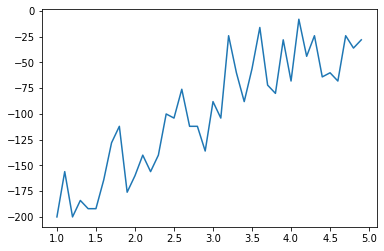

In [75]:
fig = plt.figure()
plt.plot(temperature, energy_massiv)
plt.show()
fig.savefig('saved_figure.png')

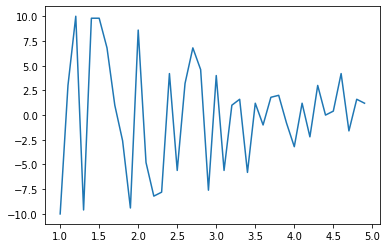

In [76]:
fig = plt.figure()
plt.plot(temperature, M_massiv)
plt.show()
fig.savefig('saved_figure_M.png')